In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import re

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_colwidth', -1)

# Importing the .csv files - cleaning the tables

In [3]:
import glob
filenames = glob.glob("tabula-usda*.csv")

df_total_list=[]
df_animals_not_used_list=[]
df_animals_not_pain_no_drugs_list=[]
df_animals_with_pain_with_drugs_list=[]
df_animals_with_pain_no_drugs_list=[]

for filename in filenames:
    df=pd.read_csv(filename)
    df['filename'] = filename
    df_total=df.iloc[:52]
    df_animals_not_used=df.iloc[54:106]
    df_animals_not_pain_no_drugs=df.iloc[108:160]
    df_animals_with_pain_with_drugs=df.iloc[162:214]
    df_animals_with_pain_no_drugs=df.iloc[216:268]
    
    df_total_list.append(df_total)
    df_animals_not_used_list.append(df_animals_not_used)
    df_animals_not_pain_no_drugs_list.append(df_animals_not_pain_no_drugs)
    df_animals_with_pain_with_drugs_list.append(df_animals_with_pain_with_drugs)
    df_animals_with_pain_no_drugs_list.append(df_animals_with_pain_no_drugs)
    

# CONCAT THE FIRST DATA - CREATE ['YEAR'] COLUMN


In [4]:
df_total = pd.concat(df_total_list, sort=True, ignore_index=True)
df_animals_not_used = pd.concat(df_animals_not_used_list, sort=True, ignore_index=True)
df_animals_not_pain_no_drugs = pd.concat(df_animals_not_pain_no_drugs_list, sort=True, ignore_index=True)
df_animals_with_pain_with_drugs = pd.concat(df_animals_with_pain_with_drugs_list, sort=True, ignore_index=True)
df_animals_with_pain_no_drugs = pd.concat(df_animals_with_pain_no_drugs_list, sort=True, ignore_index=True)


In [5]:
df_total['Year']=df_total.filename.str.extract(r"-(\d\d\d\d)[.]csv")
df_animals_with_pain_no_drugs['Year']=df_animals_with_pain_no_drugs.filename.str.extract(r"-(\d\d\d\d)[.]csv")

In [6]:
df_total

,All Other Covered Specie,Cats,Dogs,Guinea Pigs,Hamsters,Marine Mammals,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total,Unnamed: 0,filename,Year
0,981,202,41,8,183,0,0,0,0,0,0,"1,415",AK,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
1,"1,542",281,"1,692",174,216,0,"1,338","1,155",897,"1,046",59,"8,400",AL,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
2,49,97,289,244,17,0,135,103,238,721,0,"1,893",AR,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
3,"2,615",257,553,207,17,0,46,52,498,334,40,"4,619",AZ,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
4,"10,550","1,567","2,899","25,119","6,253",0,"3,710","7,320","4,167","47,941","1,650","111,176",CA,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
5,"1,670",371,546,"4,402","1,926",0,0,228,743,469,658,"11,013",CO,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
6,"1,330",32,434,511,493,0,292,0,615,344,5,"4,056",CT,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
7,"11,941",70,24,384,373,0,269,33,"1,090",148,23,"14,355",DC,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
8,158,328,307,"4,083",570,0,0,385,70,"17,285",477,"23,663",DE,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008
9,"3,014",354,332,504,496,0,481,774,972,460,194,"7,581",FL,tabula-usda-annual-report-animal-usage-in-research-2008.csv,2008


# Cleaning the 2016 data cause they were different

In [7]:
at_2016=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2016.csv')
at_2016['Year']='2016'

at_2016_animals_not_used=at_2016.iloc[:47]
at_2016_animals_not_pain_no_drugs=at_2016.iloc[50:101]
at_2016_animals_with_pain_with_drugs=at_2016.iloc[104:155]
at_2016_animals_with_pain_no_drugs=at_2016.iloc[158:192]
at_2016_total=at_2016.iloc[195:246]

In [8]:
at_2016_animals_with_pain_no_drugs

,Unnamed: 0,All Other Covered Species,Cats,Dogs,Other Farm Animals,Pig,Rabbits,Sheep,Hamsters,Nonhuman Primates,Guinea Pigs,Total,Year
158,AL,60,12,274,0,0,0,0,0,0,0,346,2016
159,CA,325,109,"1,058",558,0,0,0,0,0,0,"2,050",2016
160,CO,195,74,2,226,12,21,0,0,0,0,530,2016
161,CT,3,477,2,0,0,0,10,26,0,0,518,2016
162,DC,0,0,0,274,0,0,0,0,0,0,274,2016
163,FL,177,0,0,418,11,0,6,0,0,0,612,2016
164,GA,174,"1,869","2,720",0,0,0,23,0,4,0,"4,790",2016
165,HI,0,77,0,0,0,0,0,0,0,0,77,2016
166,IA,0,"4,997",4,80,0,6,0,0,0,0,"5,087",2016
167,IL,384,45,3,3,255,0,8,19,0,0,717,2016


In [9]:
at_2016.keys()

Index(['Unnamed: 0', 'All Other\rCovered\rSpecies', 'Cats', 'Dogs',
       'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Sheep', 'Hamsters',
       'Nonhuman\rPrimates', 'Guinea Pigs', 'Total', 'Year'],
      dtype='object')

In [10]:

at_2016_animals_with_pain_no_drugs.rename(columns={
        'Dogs':'Sheep1'},inplace=True)

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:

at_2016_animals_with_pain_no_drugs.rename(columns={
        'Sheep':'Dogs'},inplace=True)

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:

at_2016_animals_with_pain_no_drugs.rename(columns={
        'Sheep1':'Sheep'},inplace=True)



/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
at_2016_animals_with_pain_no_drugs.rename(columns={
        'Guinea Pigs':'Other Farm\rAnimals1'},inplace=True)
at_2016_animals_with_pain_no_drugs.keys()

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['Unnamed: 0', 'All Other\rCovered\rSpecies', 'Cats', 'Sheep',
       'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Dogs', 'Hamsters',
       'Nonhuman\rPrimates', 'Other Farm\rAnimals1', 'Total', 'Year'],
      dtype='object')

In [14]:
at_2016_animals_with_pain_no_drugs.rename(columns={
        'Other Farm\rAnimals':'Guinea Pigs'},inplace=True)
at_2016_animals_with_pain_no_drugs.keys()

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['Unnamed: 0', 'All Other\rCovered\rSpecies', 'Cats', 'Sheep',
       'Guinea Pigs', 'Pig', 'Rabbits', 'Dogs', 'Hamsters',
       'Nonhuman\rPrimates', 'Other Farm\rAnimals1', 'Total', 'Year'],
      dtype='object')

In [15]:
at_2016_animals_with_pain_no_drugs.rename(columns={
        'Other Farm\rAnimals1':'Other Farm\rAnimals'},inplace=True)

at_2016_animals_with_pain_no_drugs.keys()

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['Unnamed: 0', 'All Other\rCovered\rSpecies', 'Cats', 'Sheep',
       'Guinea Pigs', 'Pig', 'Rabbits', 'Dogs', 'Hamsters',
       'Nonhuman\rPrimates', 'Other Farm\rAnimals', 'Total', 'Year'],
      dtype='object')

In [16]:
at_2016_animals_with_pain_no_drugs.rename(columns={
        'Nonhuman\rPrimates':'Cats1'},inplace=True)

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
at_2016_animals_with_pain_no_drugs.rename(columns={
        'Cats':'Nonhuman\rPrimates'},inplace=True)

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [18]:
at_2016_animals_with_pain_no_drugs.rename(columns={
        'Cats1':'Cats'},inplace=True)

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [19]:
at_2016_animals_with_pain_no_drugs=at_2016_animals_with_pain_no_drugs[['Unnamed: 0', 'All Other\rCovered\rSpecies', 'Cats', 'Dogs',
       'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Sheep', 'Hamsters','Nonhuman\rPrimates', 'Guinea Pigs', 'Total', 'Year']]

# Cleaning the 2015 data cause they were different

In [20]:
at_2015=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2015.csv')
at_2015['Year']='2015'

at_2015_animals_not_used=at_2015.iloc[:52]
at_2015_animals_not_pain_no_drugs=at_2015.iloc[54:106]
at_2015_animals_with_pain_with_drugs=at_2015.iloc[108:159]
at_2015_animals_with_pain_no_drugs=at_2015.iloc[162:213]
at_2015_total=at_2015.iloc[216:267]

# Cleaning the 2014 data cause they were different

In [21]:
at_2014=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2014.csv')
at_2014['Year']='2014'


at_2014_animals_not_used=at_2014.iloc[:52]
at_2014_animals_not_pain_no_drugs=at_2014.iloc[54:106]
at_2014_animals_with_pain_with_drugs=at_2014.iloc[108:159]
at_2014_animals_with_pain_no_drugs=at_2014.iloc[162:213]
at_2014_total=at_2014.iloc[216:267]

# Cleaning the 2013 data cause they were different

In [22]:
at_2013=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2013.csv')
at_2013['Year']='2013'

at_2013_animals_not_used=at_2013.iloc[:52]
at_2013_animals_not_pain_no_drugs=at_2013.iloc[54:106]
at_2013_animals_with_pain_with_drugs=at_2013.iloc[108:160]
at_2013_animals_with_pain_no_drugs=at_2013.iloc[162:214]
at_2013_total=at_2013.iloc[216:268]

# Cleaning the 2012 data cause they were different

In [23]:
at_2012=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2012.csv')
at_2012['Year']='2012'

at_2012_animals_not_used=at_2012.iloc[:52]
at_2012_animals_not_pain_no_drugs=at_2012.iloc[54:106]
at_2012_animals_with_pain_with_drugs=at_2012.iloc[108:160]
at_2012_animals_with_pain_no_drugs=at_2012.iloc[162:214]
at_2012_total=at_2012.iloc[216:268]

# Cleaning the 2011  data cause they were different

In [24]:
at_2011=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2011.csv')
at_2011['Year']='2011'

at_2011_animals_not_used=at_2011.iloc[:52]
at_2011_animals_not_pain_no_drugs=at_2011.iloc[54:106]
at_2011_animals_with_pain_with_drugs=at_2011.iloc[108:160]
at_2011_animals_with_pain_no_drugs=at_2011.iloc[162:214]
at_2011_total=at_2011.iloc[216:268]

# Cleaning the 2010  data cause they were different

In [25]:
at_2010=pd.read_csv('unclean/tabula-usda-annual-report-animal-usage-in-research-2010.csv')
at_2010['Year']='2010'

at_2010_total=at_2010.iloc[:52]
at_2010_animals_with_pain_with_drugs=at_2010.iloc[54:106]
at_2010_animals_with_pain_no_drugs=at_2010.iloc[108:160]
at_2010_animals_not_pain_no_drugs=at_2010.iloc[162:214]
at_2010_animals_not_used=at_2010.iloc[216:268]


# Combining the different data with the rest

In [26]:
total_animals=pd.concat([df_total,at_2011_total,at_2010_total,at_2012_total,at_2013_total,at_2014_total,at_2015_total,at_2016_total],sort=True, ignore_index=True)
animals_not_used=pd.concat([df_animals_not_used,at_2010_animals_not_used,at_2011_animals_not_used,at_2012_animals_not_used,at_2013_animals_not_used,at_2014_animals_not_used,at_2015_animals_not_used,at_2016_animals_not_used],sort=True, ignore_index=True)
total_animals_not_pain_no_drugs=pd.concat([df_animals_not_pain_no_drugs,at_2010_animals_not_pain_no_drugs,at_2011_animals_not_pain_no_drugs,at_2012_animals_not_pain_no_drugs,at_2013_animals_not_pain_no_drugs,at_2014_animals_not_pain_no_drugs,at_2015_animals_not_pain_no_drugs,at_2016_animals_not_pain_no_drugs,at_2011_animals_not_pain_no_drugs],sort=True, ignore_index=True)
total_animals_with_pain_with_drugs=pd.concat([df_animals_with_pain_with_drugs,at_2010_animals_with_pain_with_drugs,at_2011_animals_with_pain_with_drugs,at_2012_animals_with_pain_with_drugs,at_2013_animals_with_pain_with_drugs,at_2014_animals_with_pain_with_drugs,at_2015_animals_with_pain_with_drugs,at_2016_animals_with_pain_with_drugs],sort=True, ignore_index=True)
animals_with_pain_no_drugs=pd.concat([df_animals_with_pain_no_drugs,at_2010_animals_with_pain_no_drugs,at_2011_animals_with_pain_no_drugs,at_2012_animals_with_pain_no_drugs,at_2013_animals_with_pain_no_drugs,at_2014_animals_with_pain_no_drugs,at_2015_animals_with_pain_no_drugs,at_2016_animals_with_pain_no_drugs],sort=True, ignore_index=True)

# CLEANING the Animals with pain no drugs

In [27]:
animals_with_pain_no_drugs['All Other\rCovered\rSpecie'].fillna(animals_with_pain_no_drugs['ALL OTHER\rCOVERED\rSPECIE'], inplace=True)
animals_with_pain_no_drugs['All Other\rCovered\rSpecies'].fillna(animals_with_pain_no_drugs['All Other\rCovered\rSpecie'], inplace=True)
animals_with_pain_no_drugs.Cats.fillna(animals_with_pain_no_drugs.CATS, inplace=True)
animals_with_pain_no_drugs.Dogs.fillna(animals_with_pain_no_drugs.DOGS, inplace=True)
animals_with_pain_no_drugs['Guinea Pigs'].fillna(animals_with_pain_no_drugs['GUINEA\rPIGS'], inplace=True)
animals_with_pain_no_drugs.Hamsters.fillna(animals_with_pain_no_drugs.HAMSTERS, inplace=True)
animals_with_pain_no_drugs['Nonhuman\rPrimates'].fillna(animals_with_pain_no_drugs['NONHUMAN\rPRIMATES'], inplace=True)
animals_with_pain_no_drugs['Other Farm\rAnimals'].fillna(animals_with_pain_no_drugs['OTHER\rFARM\rANIMALS'], inplace=True)
animals_with_pain_no_drugs.Pig.fillna(animals_with_pain_no_drugs.PIG, inplace=True)
animals_with_pain_no_drugs.Rabbits.fillna(animals_with_pain_no_drugs.RABBITS, inplace=True)
animals_with_pain_no_drugs.Sheep.fillna(animals_with_pain_no_drugs.SHEEP, inplace=True)
animals_with_pain_no_drugs.rename(columns={
        'Unnamed: 0':'State'},inplace=True)

Get rid the double columns

In [28]:
animals_with_pain_no_drugs.drop(columns=['CATS','DOGS','GUINEA\rPIGS', 'HAMSTERS','NONHUMAN\rPRIMATES','OTHER\rFARM\rANIMALS','PIG','RABBITS','SHEEP','ALL OTHER\rCOVERED\rSPECIE','All Other\rCovered\rSpecie','filename','Unnamed: 12'], inplace=True)

In [29]:
animals_with_pain_no_drugs['date_year']=pd.to_datetime(animals_with_pain_no_drugs.Year, format='%Y')

In [30]:
animals_with_pain_no_drugs['Cats']=pd.to_numeric(animals_with_pain_no_drugs.Cats.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Dogs']=pd.to_numeric(animals_with_pain_no_drugs.Dogs.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Hamsters']=pd.to_numeric(animals_with_pain_no_drugs.Hamsters.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Guinea Pigs']=pd.to_numeric(animals_with_pain_no_drugs['Guinea Pigs'].str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['All Other\rCovered\rSpecies']=pd.to_numeric(animals_with_pain_no_drugs['All Other\rCovered\rSpecies'].str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Marine\rMammals']=pd.to_numeric(animals_with_pain_no_drugs['Marine\rMammals'].str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Pig']=pd.to_numeric(animals_with_pain_no_drugs.Pig.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Rabbits']=pd.to_numeric(animals_with_pain_no_drugs.Rabbits.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Sheep']=pd.to_numeric(animals_with_pain_no_drugs.Sheep.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Total']=pd.to_numeric(animals_with_pain_no_drugs.Total.str.replace(',',''), errors='coerce')
animals_with_pain_no_drugs['Other Farm\rAnimals']=pd.to_numeric(animals_with_pain_no_drugs['Other Farm\rAnimals'].str.replace(',',''), errors='coerce')


In [31]:
animals_with_pain_no_drugs

,All Other Covered Species,Cats,Dogs,Guinea Pigs,Hamsters,Marine Mammals,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total,State,Year,date_year
0,0,0,0,0,0,0.0,0,0,0,0,0,0,AK,2008,2008-01-01
1,0,0,0,0,0,0.0,15,0,0,23,0,38,AL,2008,2008-01-01
2,0,0,0,0,0,0.0,0,0,0,0,0,0,AR,2008,2008-01-01
3,0,0,0,0,0,0.0,0,0,56,0,0,56,AZ,2008,2008-01-01
4,169,0,90,1509,38,0.0,40,0,54,465,14,2379,CA,2008,2008-01-01
5,159,0,1,1173,541,0.0,0,0,3,0,21,1898,CO,2008,2008-01-01
6,6,0,17,90,0,0.0,13,0,0,0,0,126,CT,2008,2008-01-01
7,61,0,0,164,0,0.0,4,0,0,0,0,229,DC,2008,2008-01-01
8,54,0,37,1278,250,0.0,0,0,0,985,0,2604,DE,2008,2008-01-01
9,0,0,0,0,102,0.0,4,15,0,90,0,211,FL,2008,2008-01-01


# Cleaning the total

In [32]:
total_animals['All Other\rCovered\rSpecie'].fillna(total_animals['ALL OTHER\rCOVERED\rSPECIE'], inplace=True)
total_animals['All Other\rCovered\rSpecies'].fillna(total_animals['All Other\rCovered\rSpecie'], inplace=True)
total_animals.Cats.fillna(total_animals.CATS, inplace=True)
total_animals.Dogs.fillna(total_animals.DOGS, inplace=True)
total_animals['Guinea Pigs'].fillna(total_animals['GUINEA\rPIGS'], inplace=True)
total_animals.Hamsters.fillna(total_animals.HAMSTERS, inplace=True)
total_animals['Nonhuman\rPrimates'].fillna(total_animals['NONHUMAN\rPRIMATES'], inplace=True)
total_animals['Other Farm\rAnimals'].fillna(total_animals['OTHER\rFARM\rANIMALS'], inplace=True)
total_animals.Pig.fillna(total_animals.PIG, inplace=True)
total_animals.Rabbits.fillna(total_animals.RABBITS, inplace=True)
total_animals.Sheep.fillna(total_animals.SHEEP, inplace=True)
total_animals.rename(columns={
        'Unnamed: 0':'State'},inplace=True)

In [33]:
total_animals.drop(columns=['CATS','DOGS','GUINEA\rPIGS', 'HAMSTERS','NONHUMAN\rPRIMATES','OTHER\rFARM\rANIMALS','PIG','RABBITS','SHEEP','ALL OTHER\rCOVERED\rSPECIE','All Other\rCovered\rSpecie','filename'], inplace=True)

In [34]:
total_animals['date_year']=pd.to_datetime(total_animals.Year, format='%Y')


In [35]:
total_animals['Cats']=pd.to_numeric(total_animals.Cats.str.replace(',',''), errors='coerce')
total_animals['Dogs']=pd.to_numeric(total_animals.Dogs.str.replace(',',''), errors='coerce')
total_animals['Hamsters']=pd.to_numeric(total_animals.Hamsters.str.replace(',',''), errors='coerce')
total_animals['Guinea Pigs']=pd.to_numeric(total_animals['Guinea Pigs'].str.replace(',',''), errors='coerce')
total_animals['All Other\rCovered\rSpecies']=pd.to_numeric(total_animals['All Other\rCovered\rSpecies'].str.replace(',',''), errors='coerce')
total_animals['Marine\rMammals']=pd.to_numeric(total_animals['Marine\rMammals'].str.replace(',',''), errors='coerce')
total_animals['Pig']=pd.to_numeric(total_animals.Pig.str.replace(',',''), errors='coerce')
total_animals['Rabbits']=pd.to_numeric(total_animals.Rabbits.str.replace(',',''), errors='coerce')
total_animals['Sheep']=pd.to_numeric(total_animals.Sheep.str.replace(',',''), errors='coerce')
total_animals['Total']=pd.to_numeric(total_animals.Total.str.replace(',',''), errors='coerce')
total_animals['Other Farm\rAnimals']=pd.to_numeric(total_animals['Other Farm\rAnimals'].str.replace(',',''), errors='coerce')


In [36]:
total_animals.keys()

Index(['All Other\rCovered\rSpecies', 'Cats', 'Dogs', 'Guinea Pigs',
       'Hamsters', 'Marine\rMammals', 'Nonhuman\rPrimates',
       'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Sheep', 'Total', 'State',
       'Unnamed: 12', 'Year', 'date_year'],
      dtype='object')

In [37]:
total_animals[total_animals.Year=='2014']

,All Other Covered Species,Cats,Dogs,Guinea Pigs,Hamsters,Marine Mammals,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total,State,Unnamed: 12,Year,date_year
312,2409,176,1468,177,271,NaN,236,503,447,1076,235,6998,AL,NaN,2014,2014-01-01
313,13,184,657,95,47,NaN,127,131,963,1085,0,3302,AR,NaN,2014,2014-01-01
314,3717,729,2156,102,72,NaN,41,238,395,335,201,7986,AZ,NaN,2014,2014-01-01
315,24426,1525,3307,6994,3521,NaN,"3,767",8342,6350,24659,1319,84210,CA,NaN,2014,2014-01-01
316,1461,430,804,2908,1012,NaN,1,114,724,885,391,8730,CO,NaN,2014,2014-01-01
317,1513,0,454,205,1094,NaN,287,0,265,111,0,3929,CT,NaN,2014,2014-01-01
318,319,46,6,715,415,NaN,161,0,316,268,28,2274,DC,NaN,2014,2014-01-01
319,1118,82,85,55,0,NaN,0,455,0,6888,31,8714,DE,NaN,2014,2014-01-01
320,3736,339,881,437,176,NaN,"1,642",193,1465,219,159,9247,FL,NaN,2014,2014-01-01
321,2920,460,1593,988,12375,NaN,"2,004",85,824,4157,110,25516,GA,NaN,2014,2014-01-01


In [38]:
total_animals.Cats

0      202 
1      281 
2      97  
3      257 
4      1567
5      371 
6      32  
7      70  
8      328 
9      354 
10     792 
11     2   
12     1916
13     8   
14     987 
15     157 
16     573 
17     49  
18     200 
19     107 
20     108 
21     0   
22     456 
23     1434
24     1433
25     7   
26     5   
27     1197
28     163 
29     472 
30     11  
31     148 
32     59  
33     2   
34     2077
35     931 
36     99  
37     24  
38     1819
39     0   
40     21  
41     236 
42     18  
43     165 
44     423 
45     101 
46     66  
47     20  
48     177 
49     238 
50     36  
51     9   
52     0   
53     216 
54     80  
55     90  
56     1580
57     275 
58     18  
59     52  
60     266 
61     463 
62     665 
63     1   
64     1186
65     12  
66     1010
67     217 
68     547 
69     125 
70     233 
71     115 
72     68  
73     0   
74     602 
75     1937
76     1643
77     5   
78     4   
79     1164
80     152 
81     272 
82     5   
83  

# GRAPHS

In [48]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [49]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family'         : 'arial',
    'font.style'          : 'normal',
    'font.variant'        : 'normal',
    'font.weight'         : 'light',
    'font.stretch'        : 'normal',
  'lines.linewidth': 2,
  'lines.solid_capstyle': 'butt',
  'legend.fancybox': True,
  'axes.prop_cycle': cycler('color', ['#00485C', '#EC8A6A','#04A5D3', '#5F8696', '#5FBD96', '#0074D9']),
  'axes.facecolor': '#D5E3E9',
  'axes.labelsize': 8,
  'axes.axisbelow': True,
  'axes.grid': True,
  'axes.edgecolor': 'Black',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
  'patch.edgecolor': 'black',
  'patch.linewidth': 0.5,
  'svg.fonttype': 'path',
  'grid.linestyle': '-',
  'grid.linewidth': 1.0,
  'grid.color': 'white',
  'xtick.major.size': 4,
  'xtick.minor.size': 4,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
  'font.size': 10.0,
  'savefig.edgecolor': '#D5E3E9',
  'savefig.facecolor': '#D5E3E9',
  'figure.subplot.left': 0.05,
  'figure.subplot.right': 0.95,
  'figure.subplot.bottom': 0.07,
  'figure.facecolor': '#D5E3E9',
  'legend.fancybox': True,
    
})

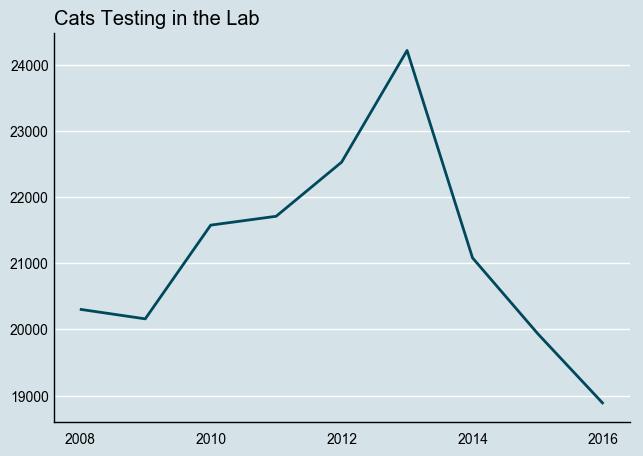

In [74]:
ax=total_animals.groupby('date_year').Cats.sum().plot()


ax.set_title('Cats Testing in the Lab', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
plt.savefig("cats.png")
plt.show()

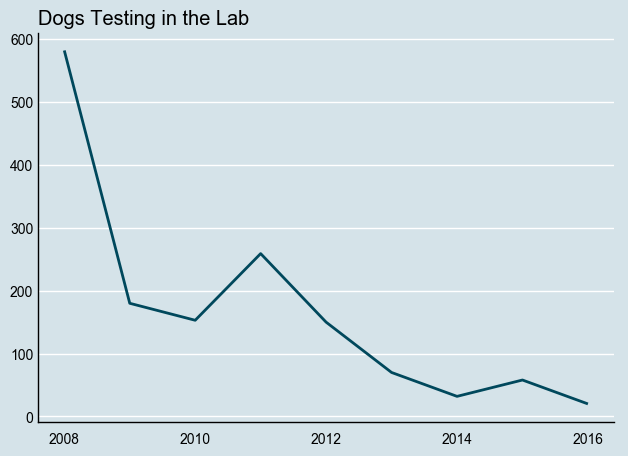

In [73]:
ax=animals_with_pain_no_drugs.groupby('date_year').Cats.sum().plot()


ax.set_title('Dogs Testing in the Lab', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
plt.savefig("dogs.png")
plt.show()

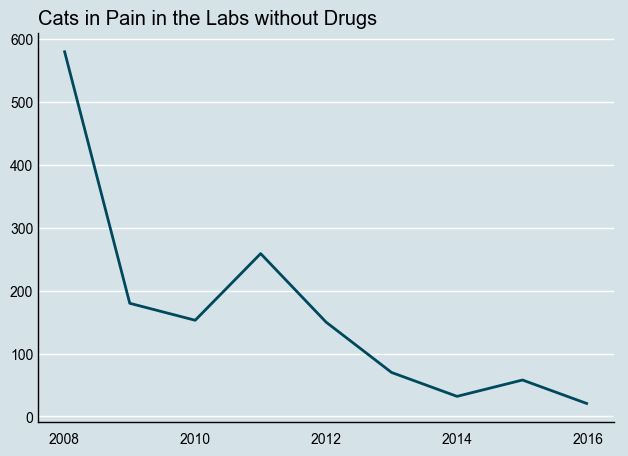

In [75]:
ax=animals_with_pain_no_drugs.groupby('date_year').Cats.sum().plot()

ax.set_title('Cats in Pain in the Labs without Drugs', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
plt.savefig("cats_wpain.png")
plt.show()

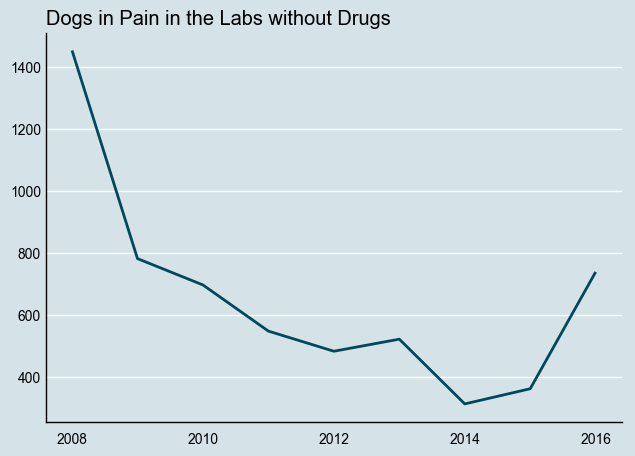

In [76]:
ax=animals_with_pain_no_drugs.groupby('date_year').Dogs.sum().plot()

ax.set_title('Dogs in Pain in the Labs without Drugs', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
plt.savefig("dogs_wpain.png")
plt.show()

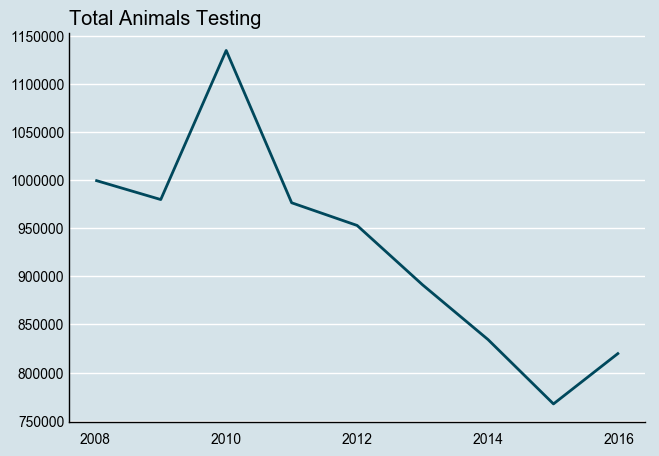

In [82]:
ax=total_animals.groupby('date_year').Total.sum().plot()

ax.set_title('Total Animals Testing', loc='left')
ax.title.set_fontsize(22)
ax.title.set_fontweight(weight='black')
ax.set(ylabel="")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.tick_params(which='minor', left=False, bottom=False)


ax.grid(True, axis='y', color='white', linestyle='-')
ax.grid(True, axis='x', color='white', linestyle='')

ax.set_xlabel("", fontname="Arial", fontsize=8)

# then we save it
plt.savefig("total.png")
plt.show()

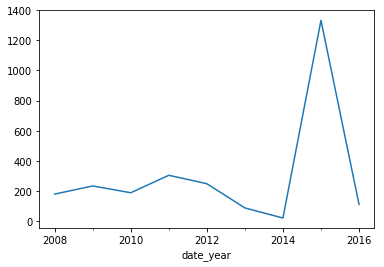

In [43]:
animals_with_pain_no_drugs.groupby('date_year')['Other Farm\rAnimals'].sum().plot()

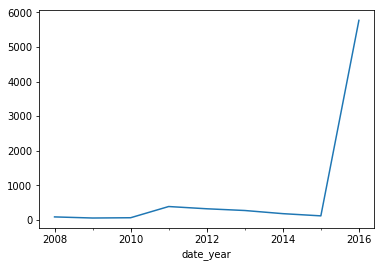

In [47]:
animals_with_pain_no_drugs.groupby('date_year')['Sheep'].sum().plot()

In [44]:
animals_with_pain_no_drugs.keys()

Index(['All Other\rCovered\rSpecies', 'Cats', 'Dogs', 'Guinea Pigs',
       'Hamsters', 'Marine\rMammals', 'Nonhuman\rPrimates',
       'Other Farm\rAnimals', 'Pig', 'Rabbits', 'Sheep', 'Total', 'State',
       'Year', 'date_year'],
      dtype='object')